# Laureates

This file contains all of the data investigation to do with individual prize winners.



In [201]:
import json
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from collections import Counter

In [202]:
file_path = "data/laureates-1000.json"

with open(file_path, 'r') as file:
    data = json.load(file)

laureates = data['laureates']

In [203]:
# 1. How many laureates are there in the dataset? To match the Nobel Prize website, we would expect 1000
print(f"Number of laureates: {len(laureates)}")

Number of laureates: 992


In [204]:
laureates

[{'id': '745',
  'knownName': {'en': 'A. Michael Spence', 'se': 'A. Michael Spence'},
  'givenName': {'en': 'A. Michael', 'se': 'A. Michael'},
  'familyName': {'en': 'Spence', 'se': 'Spence'},
  'fullName': {'en': 'A. Michael Spence', 'se': 'A. Michael Spence'},
  'fileName': 'spence',
  'gender': 'male',
  'birth': {'date': '1943-00-00',
   'place': {'city': {'en': 'Montclair, NJ',
     'no': 'Montclair, NJ',
     'se': 'Montclair, NJ'},
    'country': {'en': 'USA', 'no': 'USA', 'se': 'USA'},
    'cityNow': {'en': 'Montclair, NJ',
     'no': 'Montclair, NJ',
     'se': 'Montclair, NJ',
     'sameAs': ['https://www.wikidata.org/wiki/Q678437',
      'https://www.wikipedia.org/wiki/Montclair,_New_Jersey'],
     'latitude': '40.825930',
     'longitude': '-74.209030'},
    'countryNow': {'en': 'USA',
     'no': 'USA',
     'se': 'USA',
     'sameAs': ['https://www.wikidata.org/wiki/Q30'],
     'latitude': '39.828175',
     'longitude': '-98.579500'},
    'continent': {'en': 'North America

In [205]:
"""
Calculate the age of a Nobel Prize laureate when they were awarded the prize.
"""
def calculate_nobel_age(birth_date: str, award_year: str) -> int:
    # Check if the birth_date includes month and day
    if "-00-00" in birth_date:
        # Extract only the year and assume the earliest possible birth date (January 1st)
        birth_year = int(birth_date[:4])
        birth_date = datetime(year=birth_year, month=1, day=1)
        # We'll have to assume that they were at least born in that year,
        # so the calculated age will be the maximum possible given the information.
        incomplete_date = True
    else:
        # Convert the birth_date string to a datetime object
        birth_date = datetime.strptime(birth_date, "%Y-%m-%d")
        incomplete_date = False
    
    # Create a datetime object for December 10th of the award year
    award_date = datetime(year=int(award_year), month=12, day=10)
    
    # Calculate the difference in years
    age = award_date.year - birth_date.year
    
    if not incomplete_date:
        # If the award date is before the laureate's birthday in that year, subtract 1 from the age
        if (award_date.month, award_date.day) < (birth_date.month, birth_date.day):
            age -= 1
    
    return age

In [206]:
data = []

for laureate in laureates:
    # NAME
    name = laureate.get('knownName', {}).get('en', 'Unknown')

    # BIRTH DATE
    birth_date = laureate.get('birth', {}).get('date')
    if not birth_date or birth_date.startswith('0000'):  # Skip entries with missing or invalid birth dates
        continue
    
    prizes = laureate.get('nobelPrizes', [])
    if not prizes:  # Skip entries with missing prizes
        continue
    
    # Sort the prizes by year of award
    prizes_sorted = sorted(prizes, key=lambda x: int(x['awardYear']))

    first_prize = prizes_sorted[0]

    # CATEGORY Get the category of the first prize
    category = first_prize.get('category', {}).get('en')
    if category in ['Literature', 'Peace', 'Economic Sciences']:  # Exclude 'Literature' and 'Peace' prizes
        continue

    award_year = first_prize['awardYear']

    # Calculate the age of the laureate at the time of the first prize
    if award_year and birth_date:
        age_at_award = calculate_nobel_age(birth_date, award_year)

    affiliations = first_prize.get('affiliations', [])

    if not affiliations:  # Skip entries with missing affiliations
        continue

    first_affiliation = affiliations[0]

    # AFFILIATION
    affil_city = first_affiliation.get('cityNow', {})

    if not affil_city:  # Skip entries with missing city information
        continue

    affil_continent = first_affiliation.get('continent', {}).get('en', {})

    if not affil_continent:  # Skip entries with missing continent information
        continue

    affil_lat = affil_city.get('latitude')
    affil_lon = affil_city.get('longitude')

    if not affil_lat or not affil_lon:  # Skip entries with missing coordinates
        continue

    # GENDER
    gender = laureate.get('gender', 'Unknown')

    # BIRTH PLACE
    birth_place = laureate.get('birth', {}).get('place', {})
    birth_city = birth_place.get('cityNow', {})

    if not birth_city:  # Skip entries with missing birth city information
        continue

    birth_continent = birth_place.get('continent').get('en', {})
    
    if not birth_continent:  # Skip entries with missing birth continent information
        continue
    
    birth_lat = birth_city.get('latitude')
    birth_lon = birth_city.get('longitude')

    if not birth_lat or not birth_lon:
        continue

    award = {
        'category': category,
        'date': f"{award_year}-12-10",
        'lat': float(affil_lat),
        'lon': float(affil_lon),
        'age': age_at_award,
        'continent': affil_continent
    }

    birth = {
        'date': birth_date,
        'lat': float(birth_lat),
        'lon': float(birth_lon),
        'continent': birth_continent
    }

    data.append({
        'name': name,
        'gender': gender,
        'award': award,
        'birth': birth
    })


In [207]:
# Examine the first entry in the data list
print(json.dumps(data[0], indent=2))

{
  "name": "Aage N. Bohr",
  "gender": "male",
  "award": {
    "category": "Physics",
    "date": "1975-12-10",
    "lat": 55.678127,
    "lon": 12.572532,
    "age": 53,
    "continent": "Europe"
  },
  "birth": {
    "date": "1922-06-19",
    "lat": 55.678127,
    "lon": 12.572532,
    "continent": "Europe"
  }
}


In [208]:
print(f"Number of laureates: {len(data)}")

Number of laureates: 612


We would expect there to be 646 laureates listed acording the the [Nobel Prize website](https://www.nobelprize.org/prizes/facts/nobel-prize-facts/).

Number of laureates:

- Physics: 225
- Chemistry: 194
- Medicine: 227

Total = 646

There are 34 entries missing from the data list.

In [209]:
# Count the Science Laureates without excluding any data
non_excluded_data = []

for laureate in laureates:
    # NAME
    name = laureate.get('knownName', {}).get('en', 'Unknown')

    prizes = laureate.get('nobelPrizes', [])
    if not prizes:  # Skip entries with missing prizes
        continue
    
    # Sort the prizes by year of award
    prizes_sorted = sorted(prizes, key=lambda x: int(x['awardYear']))

    first_prize = prizes_sorted[0]

    # CATEGORY Get the category of the first prize
    category = first_prize.get('category', {}).get('en')
    if category in ['Literature', 'Peace', 'Economic Sciences']:  # Exclude 'Literature' and 'Peace' prizes
        continue

    award = {
        'category': category,
        'date': f"{award_year}-12-10",
        'lat': float(affil_lat),
        'lon': float(affil_lon),
        'age': age_at_award,
        'continent': affil_continent
    }

    birth = {
        'date': birth_date,
        'lat': float(birth_lat),
        'lon': float(birth_lon),
        'continent': birth_continent
    }

    non_excluded_data.append({
        'name': name,
        'gender': gender,
        'award': award,
        'birth': birth
    })


In [210]:
print(f"Number of laureates in the Science category: {len(non_excluded_data)}")

Number of laureates in the Science category: 642


We are still missing 4 of of the total 646 laurates.

It's possible that some of the winners may have won a science award for their second or third Nobel Prize.

In [211]:
multiple_prize_data = []

for laureate in laureates:
    prizes = laureate.get('nobelPrizes', [])
    if not prizes:  # Skip entries with missing prizes
        continue
    
    # Extract the categories from each prize in the prizes list into a new list
    categories = [prize.get('category', {}).get('en') for prize in prizes]

    science_categories = ['Physics', 'Chemistry', 'Physiology or Medicine']
    other_categories = ['Literature', 'Peace', 'Economic Sciences']

    # If an entry in the categories list containes a category from the science_categories list AND the other_categories list
    # add this laureate to the multiple_prize_data list
    if any(category in science_categories for category in categories) and any(category in other_categories for category in categories):
        multiple_prize_data.append(laureate)

In [212]:
print(f"Number of laureates with a science prize and a non science prize: {len(multiple_prize_data)}")

Number of laureates with a science prize and a non science prize: 1


In [213]:
print(json.dumps(multiple_prize_data[0], indent=2))

{
  "id": "217",
  "knownName": {
    "en": "Linus Pauling",
    "se": "Linus Pauling"
  },
  "givenName": {
    "en": "Linus",
    "se": "Linus"
  },
  "familyName": {
    "en": "Pauling",
    "se": "Pauling"
  },
  "fullName": {
    "en": "Linus Carl Pauling",
    "se": "Linus Carl Pauling"
  },
  "fileName": "pauling",
  "gender": "male",
  "birth": {
    "date": "1901-02-28",
    "place": {
      "city": {
        "en": "Portland, OR",
        "no": "Portland, OR",
        "se": "Portland, OR"
      },
      "country": {
        "en": "USA",
        "no": "USA",
        "se": "USA"
      },
      "cityNow": {
        "en": "Portland, OR",
        "no": "Portland, OR",
        "se": "Portland, OR",
        "sameAs": [
          "https://www.wikidata.org/wiki/Q6106",
          "https://www.wikipedia.org/wiki/Portland,_Oregon"
        ],
        "latitude": "45.516667",
        "longitude": "-122.666667"
      },
      "countryNow": {
        "en": "USA",
        "no": "USA",
        

Linus Pauling won the Chemistry prize in 1954 and the Peace prize in 1962.

It's possible there are other Prize categories that I am not counting.

In [214]:
# Use a set to collect unique categories
unique_categories = set()

# Create a set of all the unique prize categories
for laureate in laureates:
    prizes = laureate.get('nobelPrizes', [])
    # Extract the categories from each prize in the prizes list into the set
    categories = {prize.get('category', {}).get('en') for prize in prizes}

    # Update the set with the new categories
    unique_categories.update(categories)

# Convert the set to a list if needed
all_categories = list(unique_categories)

In [215]:
print(all_categories)

['Physics', 'Literature', 'Chemistry', 'Physiology or Medicine', 'Economic Sciences', 'Peace']


In [216]:
# Count how many laureates have been excluded

no_prize = []
other_category = []
no_birth_date = []
no_affiliations = []
no_afil_city = []
no_afil_continent = []
no_afil_coords = []
no_birth_city = []
no_birth_continent = []
no_birth_coords = []

for laureate in laureates:
    # PRIZES
    prizes = laureate.get('nobelPrizes', [])
    if not prizes:  # Skip entries with missing prizes
        no_prize.append(laureate)
        continue
    
    # Sort the prizes by year of award
    prizes_sorted = sorted(prizes, key=lambda x: int(x['awardYear']))

    first_prize = prizes_sorted[0]

    # CATEGORY Get the category of the first prize
    category = first_prize.get('category', {}).get('en')
    if category in ['Literature', 'Peace', 'Economic Sciences']:  # Exclude 'Literature' and 'Peace' prizes
        other_category.append(laureate)
        continue

    # NAME
    name = laureate.get('knownName', {}).get('en', 'Unknown')

    # BIRTH DATE
    birth_date = laureate.get('birth', {}).get('date')
    if not birth_date or birth_date.startswith('0000'):  # Skip entries with missing or invalid birth dates
        no_birth_date.append(laureate)
        continue
    
    # AGE
    award_year = first_prize['awardYear']

    # Calculate the age of the laureate at the time of the first prize
    if award_year and birth_date:
        age_at_award = calculate_nobel_age(birth_date, award_year)

    affiliations = first_prize.get('affiliations', [])

    if not affiliations:  # Skip entries with missing affiliations
        no_affiliations.append(laureate)
        continue

    first_affiliation = affiliations[0]

    # AFFILIATION
    affil_city = first_affiliation.get('cityNow', {})

    if not affil_city:  # Skip entries with missing city information
        no_afil_city.append(laureate)
        continue

    affil_continent = first_affiliation.get('continent', {}).get('en', {})

    if not affil_continent:  # Skip entries with missing continent information
        no_afil_continent.append(laureate)
        continue

    affil_lat = affil_city.get('latitude')
    affil_lon = affil_city.get('longitude')

    if not affil_lat or not affil_lon:  # Skip entries with missing coordinates
        no_afil_coords.append(laureate)
        continue

    # GENDER
    gender = laureate.get('gender', 'Unknown')

    # BIRTH PLACE
    birth_place = laureate.get('birth', {}).get('place', {})
    birth_city = birth_place.get('cityNow', {})

    if not birth_city:  # Skip entries with missing birth city information
        no_birth_city.append(laureate)
        continue

    birth_continent = birth_place.get('continent').get('en', {})
    
    if not birth_continent:  # Skip entries with missing birth continent information
        no_birth_continent.append(laureate)
        continue
    
    birth_lat = birth_city.get('latitude')
    birth_lon = birth_city.get('longitude')

    if not birth_lat or not birth_lon:
        no_birth_coords.append(laureate)
        continue


In [217]:
print(f"Number of laureates without a prize: {len(no_prize)}")
print(f"Number of laureates with a prize in another category: {len(other_category)}")
print(f"Number of laureates without a birth date: {len(no_birth_date)}")
print(f"Number of laureates without affiliations: {len(no_affiliations)}")
print(f"Number of laureates without an affiliation city: {len(no_afil_city)}")
print(f"Number of laureates without an affiliation continent: {len(no_afil_continent)}")
print(f"Number of laureates without affiliation coordinates: {len(no_afil_coords)}")
print(f"Number of laureates without a birth city: {len(no_birth_city)}")
print(f"Number of laureates without a birth continent: {len(no_birth_continent)}")
print(f"Number of laureates without birth coordinates: {len(no_birth_coords)}")

Number of laureates without a prize: 0
Number of laureates with a prize in another category: 350
Number of laureates without a birth date: 0
Number of laureates without affiliations: 5
Number of laureates without an affiliation city: 5
Number of laureates without an affiliation continent: 0
Number of laureates without affiliation coordinates: 4
Number of laureates without a birth city: 2
Number of laureates without a birth continent: 0
Number of laureates without birth coordinates: 14


In [218]:
print(f"There are {len(laureates)} in the Nobel Laureates database - rather that 1,000 as listed on the Nobel Prize website.")
print(f"Of these, {len(non_excluded_data)} have a science prize - rather than 646 as listed on website.")
print("The visualisation excludes:")
print(f"- {len(no_affiliations)} laureates without affiliations")
print(f"- {len(no_afil_city)} laureates without an affiliation city")
print(f"- {len(no_afil_coords)} laureates without an affiliation coordinates")
print(f"- {len(no_birth_city)} lauteates without a birth city")
print(f"- {len(no_birth_coords)} laureates without birth coordinates")

There are 992 in the Nobel Laureates database - rather that 1,000 as listed on the Nobel Prize website.
Of these, 642 have a science prize - rather than 646 as listed on website.
The visualisation excludes:
- 5 laureates without affiliations
- 5 laureates without an affiliation city
- 4 laureates without an affiliation coordinates
- 2 lauteates without a birth city
- 14 laureates without birth coordinates


---

## Laureate first name

In [219]:
names = [laureate['name'] for laureate in non_excluded_data]

In [220]:
names[:5]

['Aage N. Bohr',
 'Aaron Ciechanover',
 'Aaron Klug',
 'Abdus Salam',
 'Ada E. Yonath']

In [221]:
# Remove Sir from the names
laureate_names_no_sir = list(map(lambda name: name[4:] if name.startswith('Sir ') else name, names))

In [222]:
# Extract just the first name of each laureate
first_names = list(map(lambda name: name.split()[0], laureate_names_no_sir))

In [223]:
first_names[:5]

['Aage', 'Aaron', 'Aaron', 'Abdus', 'Ada']

In [224]:
# Count the occurrences of each first name
first_name_counts = Counter(first_names)

In [225]:
# Get the top ten most common first names
top_ten_first_names = first_name_counts.most_common(10)

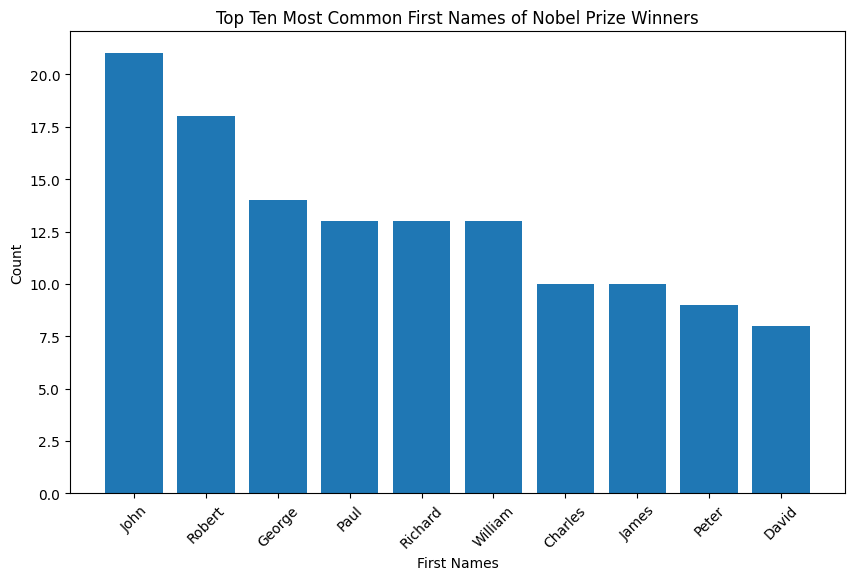

In [226]:
# Separate the names and their counts for plotting
names, counts = zip(*top_ten_first_names)

# Create a bar chart for the top ten first names
plt.figure(figsize=(10, 6))
plt.bar(names, counts)
plt.xlabel('First Names')
plt.ylabel('Count')
plt.title('Top Ten Most Common First Names of Nobel Prize Winners')
plt.xticks(rotation=45)
plt.show()

In [227]:
# Extract just the first letter of each laureate
first_letters = list(map(lambda name: name[0], laureate_names_no_sir))

In [228]:
first_letter_counts = Counter(first_letters)
top_ten_first_letters = first_letter_counts.most_common(10)

In [229]:
print(top_ten_first_letters)

[('J', 69), ('A', 62), ('R', 57), ('H', 40), ('G', 39), ('M', 37), ('E', 36), ('P', 36), ('C', 33), ('W', 33)]


In [230]:
# PRint the top ten first letters as a csv table
print("Letter,Count")
for letter, count in top_ten_first_letters:
    print(f"{letter},{count}")

Letter,Count
J,69
A,62
R,57
H,40
G,39
M,37
E,36
P,36
C,33
W,33


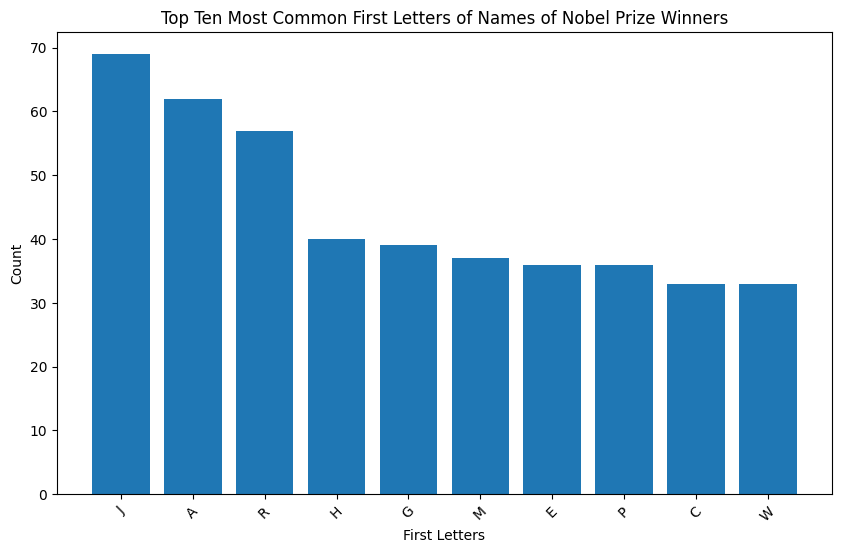

In [231]:
# Separate the names and their counts for plotting
letters, letter_counts = zip(*top_ten_first_letters)

# Create a bar chart for the top ten first names
plt.figure(figsize=(10, 6))
plt.bar(letters, letter_counts)
plt.xlabel('First Letters')
plt.ylabel('Count')
plt.title('Top Ten Most Common First Letters of Names of Nobel Prize Winners')
plt.xticks(rotation=45)
plt.show()

---

## Gender of prize winners over time

Check that we are not excluding entries with a missing Gender field

In [232]:
# Some entries do not have a gender field.
# These are prizes awarded to organizations or to multiple people.
# Each of these prizes are awarded in the Peace category so will not effect our analysis.
laureates_without_gender = [laureate for laureate in laureates if not laureate.get('gender', False) ]
prizes = [prize for laureate in laureates_without_gender for prize in laureate['nobelPrizes']]
categories = [prize['category'] for prize in prizes]
en = [lang['en'] for lang in categories]
# Create a set of unique category names
category_set = set(en)
print(category_set)

{'Peace'}


The only entries that do not include a Gender field are for the Peace award - these are normally groups or institutions and can be excluded from our counts.

In [233]:
print(json.dumps(non_excluded_data[:10], indent=2))

[
  {
    "name": "Aage N. Bohr",
    "gender": "male",
    "award": {
      "category": "Physics",
      "date": "2000-12-10",
      "lat": 59.956651,
      "lon": 30.333547,
      "age": 70,
      "continent": "Europe"
    },
    "birth": {
      "date": "1930-03-15",
      "lat": 55.184806,
      "lon": 30.201622,
      "continent": "Europe"
    }
  },
  {
    "name": "Aaron Ciechanover",
    "gender": "male",
    "award": {
      "category": "Chemistry",
      "date": "2000-12-10",
      "lat": 59.956651,
      "lon": 30.333547,
      "age": 70,
      "continent": "Europe"
    },
    "birth": {
      "date": "1930-03-15",
      "lat": 55.184806,
      "lon": 30.201622,
      "continent": "Europe"
    }
  },
  {
    "name": "Aaron Klug",
    "gender": "male",
    "award": {
      "category": "Chemistry",
      "date": "2000-12-10",
      "lat": 59.956651,
      "lon": 30.333547,
      "age": 70,
      "continent": "Europe"
    },
    "birth": {
      "date": "1930-03-15",
      "lat

In [242]:
# Create a new list containing the relevant data from the non_excluded_data list
# gender, name, award.year and award category
# [{"name": laureate["name"], "gender": laureate["gender"], "year": int(laureate["award"]["date"].split("-")[0]), "category": laureate["award"]["category"] } for laureate in non_excluded_data]
gender_list = []

for laureate in laureates:
    # NAME
    name = laureate.get('knownName', {}).get('en', 'Unknown')

    # GENDER
    gender = laureate.get('gender', 'Unknown')

    prizes = laureate.get('nobelPrizes', [])
    if not prizes:  # Skip entries with missing prizes
        continue
    
    # Sort the prizes by year of award
    prizes_sorted = sorted(prizes, key=lambda x: int(x['awardYear']))

    first_prize = prizes_sorted[0]

    # CATEGORY Get the category of the first prize
    category = first_prize.get('category', {}).get('en')
    if category in ['Literature', 'Peace', 'Economic Sciences']:  # Exclude 'Literature' and 'Peace' prizes
        continue

    award_year = first_prize['awardYear']

    gender_list.append({
        'name': name,
        'gender': gender,
        'award_year': int(award_year),
        'category': category
    })

In [243]:
print(json.dumps(gender_list[:1], indent=2))

[
  {
    "name": "Aage N. Bohr",
    "gender": "male",
    "award_year": 1975,
    "category": "Physics"
  }
]


In [244]:
# Convert the list to a DataFrame
gender_df = pd.DataFrame(gender_list)

In [246]:
gender_df.tail()

name gender  award_year                category
637    Yoichiro Nambu   male        2008                 Physics
638  Yoshinori Ohsumi   male        2016  Physiology or Medicine
639       Yuan T. Lee   male        1986               Chemistry
640      Yves Chauvin   male        2005               Chemistry
641    Zhores Alferov   male        2000                 Physics

In [249]:
# Group by year and gender, and count the occurrences
gender_distribution = gender_df.groupby(by=['award_year', 'gender'])
gender_size = gender_distribution.size()
gender_count_by_year = gender_size.unstack(fill_value=0)
gender_count_by_year.head()

gender      female  male
award_year              
1901             0     3
1902             0     4
1903             1     4
1904             0     3
1905             0     3

In [250]:
# Add a column for the total number of laureates
gender_count_by_year['total'] = gender_count_by_year.sum(axis=1)

In [251]:
gender_count_by_year.head()

gender      female  male  total
award_year                     
1901             0     3      3
1902             0     4      4
1903             1     4      5
1904             0     3      3
1905             0     3      3

In [252]:
# Add a new column for the percentage of winners which are male per year
gender_count_by_year["male_percentage"] = gender_count_by_year["male"] / gender_count_by_year["total"]
gender_count_by_year["female_percentage"] = gender_count_by_year["female"] / gender_count_by_year["total"]

In [256]:
gender_count_by_year.head()

gender      female  male  total  male_percentage  female_percentage
award_year                                                         
1901             0     3      3              1.0                0.0
1902             0     4      4              1.0                0.0
1903             1     4      5              0.8                0.2
1904             0     3      3              1.0                0.0
1905             0     3      3              1.0                0.0

In [257]:
# Count the number of male and female laureates per decade
gender_count_by_year.sort_index(inplace=True)
gender_count_by_year['decade'] = (gender_count_by_year.index // 10) * 10

In [258]:
gender_count_by_year.head()

gender      female  male  total  male_percentage  female_percentage  decade
award_year                                                                 
1901             0     3      3              1.0                0.0    1900
1902             0     4      4              1.0                0.0    1900
1903             1     4      5              0.8                0.2    1900
1904             0     3      3              1.0                0.0    1900
1905             0     3      3              1.0                0.0    1900

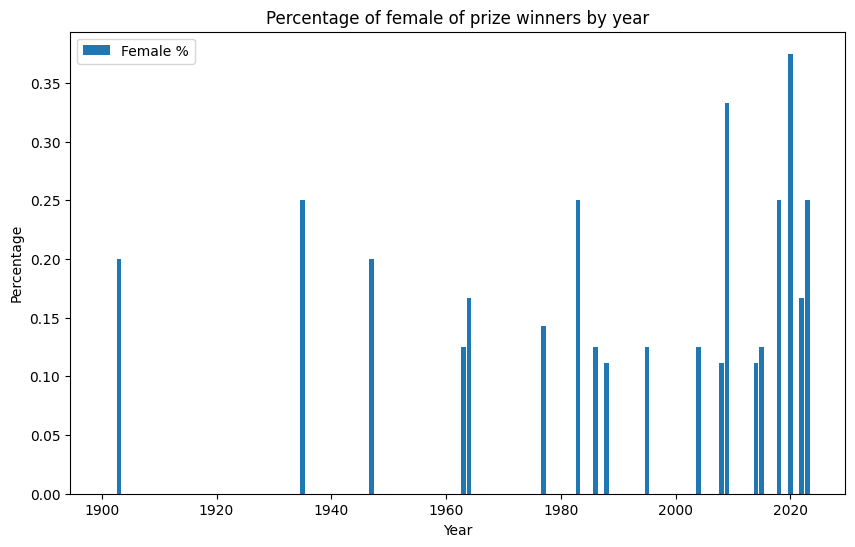

In [259]:
# Plot the percentage
plt.figure(figsize=(10, 6))
plt.bar(gender_count_by_year.index, gender_count_by_year['female_percentage'], label='Female %')

plt.xlabel('Year')
plt.ylabel('Percentage')
plt.title('Percentage of female of prize winners by year')
plt.legend(loc='upper left')

plt.show()

In [262]:
gender_count_by_year.to_csv("./output/by-gender/gender-count-by-year.csv")
gender_df.to_csv("./output/by-gender/gender-data.csv")

---

## Save the Laureates Data as json

In [238]:
# Save the data to a JSON file
file_path = './data/laureates-data.json'

In [239]:
with open(file_path, 'w') as file:
    json.dump(data, file)